In [206]:
# Importing required Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [207]:
# Dataframe
df =pd.read_csv('911_police.csv',parse_dates=['timeStamp'])

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        99492 non-null  float64       
 1   lng        99492 non-null  float64       
 2   desc       99492 non-null  object        
 3   zip        86637 non-null  float64       
 4   title      99492 non-null  object        
 5   timeStamp  99492 non-null  datetime64[ns]
 6   twp        99449 non-null  object        
 7   addr       98973 non-null  object        
 8   e          99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 6.8+ MB


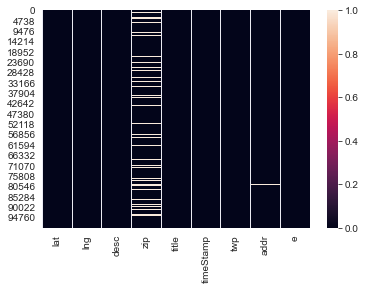

In [209]:
# Exploring Null values.
sns.heatmap(df.isnull())
plt.show()

#### We have null values in zip and e column, zip have most.

In [210]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

### What are the top 5 zipcodes for 911 calls?

In [211]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

### What are the top 5 townships(twp) for 911 calls?

In [212]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

### How many unique title codes are there?

In [213]:
df['title'].nunique()

110

## Creating New Features

In [214]:
df['Reason'] = df['title'].str.split(':',expand=True)[0]

### What is the most common reason for a 911 call based off this new column?

In [215]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

### Use seaborn to create a countplot of 911 calls by Reason

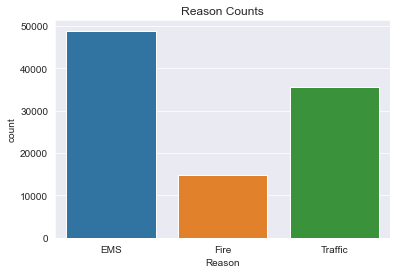

In [216]:
sns.countplot(x=df['Reason'])
plt.title("Reason Counts")
plt.show()

In [217]:
# Create Hour column from date
#df['timeStamp'].apply(lambda time:time.hour)
df['Hour'] =df['timeStamp'].dt.hour

In [218]:
# Create Month column from date
#df['timeStamp'].apply(lambda time:time.month)
df['Month'] =df['timeStamp'].dt.month

In [219]:
# Create Week day column from date
#df['timeStamp'].apply(lambda time:time.dayofweek)
df['Week_Day'] =df['timeStamp'].dt.dayofweek

In [220]:
# Creating Name for the Week day columns
day_name = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}

In [221]:
df['Week_Day'] =df['Week_Day'].map(day_name)

In [222]:
df['Week_Day'].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

### Use seaborn to create a countplot of the Day of Week column with the hue based off of the Reason column

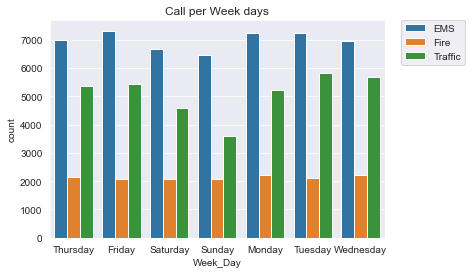

In [223]:
sns.countplot(x='Week_Day',data=df,hue='Reason')
plt.rcParams["patch.force_edgecolor"] = True
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0.)
plt.title('Call per Week days')
plt.show()

### Use seaborn to create a countplot of the Month column with the hue based off the Reason column

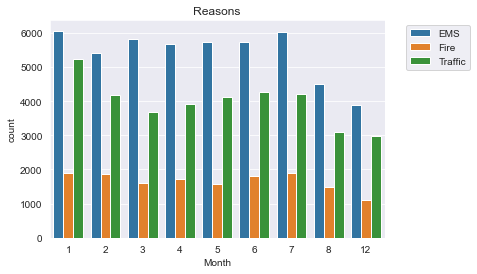

In [224]:
sns.countplot(x=df['Month'],hue=df['Reason'])
plt.legend(bbox_to_anchor=(1.05,1),loc=2)
plt.title('Reasons')
plt.show()

### Create a groupby object called byMonth that groups the DataFrame by month and uses the count() method for aggregation

In [225]:
byMonth = df.groupby('Month').count()

### Create a simple plot off of the dataframe indicating the count of calls per month

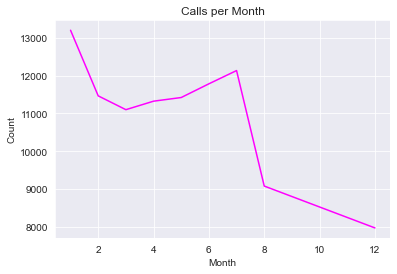

In [226]:
sns.set_style('darkgrid')
byMonth['lat'].plot(color='magenta')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title("Calls per Month")
plt.show()

## Use seaborn's lmplot() to create a linear fit on the number of calls per Month.

In [227]:
byMonth = byMonth.reset_index()

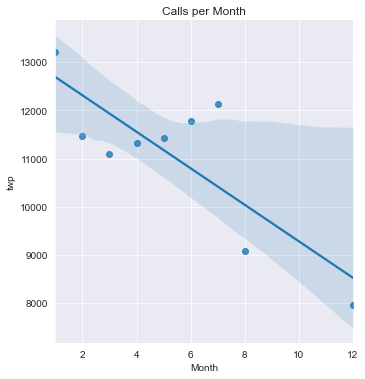

In [228]:
sns.lmplot(x='Month',y='twp',data=byMonth)
plt.title("Calls per Month")
plt.show()

## Use apply along with the .date() method to create a new column called 'Date' that contains the date from the timeStamp column.

In [229]:
#df['timeStamp'].apply(lambda time:time.date())
df['Date'] =df['timeStamp'].dt.date

##  Groupby the Date column with the count() aggregate and create a plot of counts of 911 calls

## Line Plot

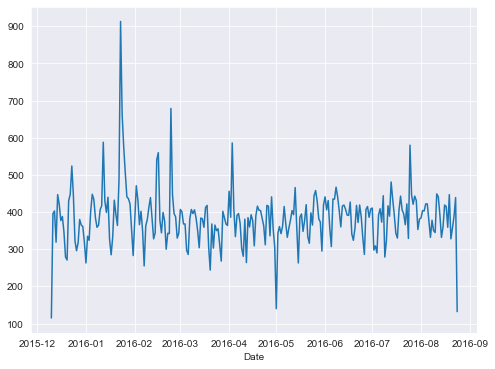

In [230]:
# Creating Line plot for all instance per date.
plt.figure(figsize=(8,6))
df.groupby('Date').count()['lat'].plot()
plt.tight_layout
plt.show()

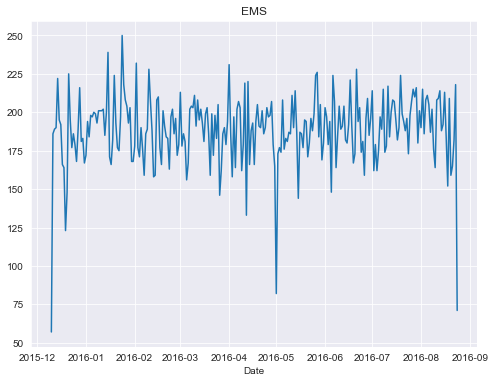

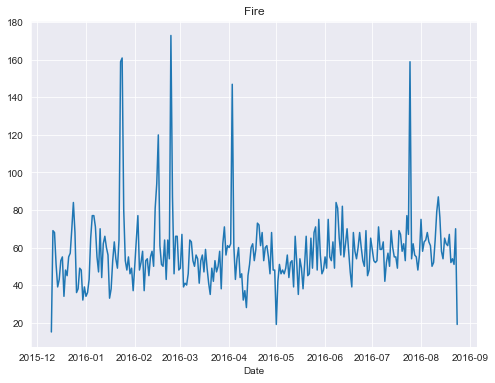

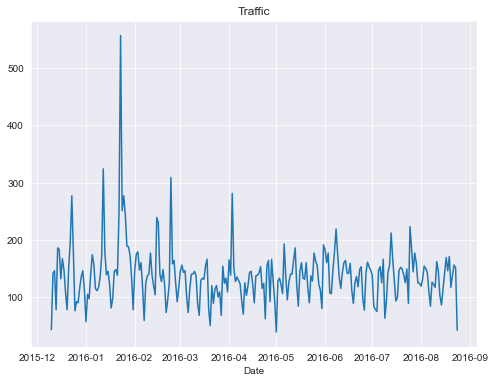

In [231]:
# Creating Line plot for Specific Reasons.
for reason in df['Reason'].unique():
    data = df.copy()
    plt.figure(figsize=(8,6))
    data[data['Reason'] == reason].groupby('Date').count()['lat'].plot()
    plt.title(reason)
    plt.show()

# Heat Maps

## By Week day and Month

In [232]:
# Creating multi-index for Week day and Month
day_month = df.groupby(['Week_Day','Month']).count()['Reason'].unstack()

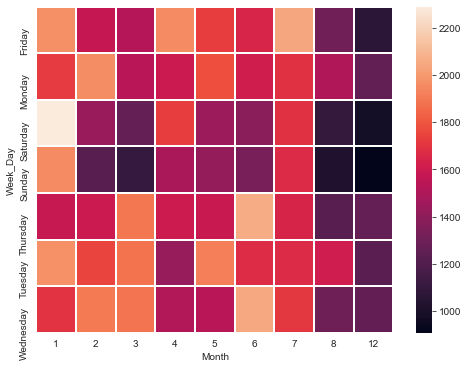

In [233]:
plt.figure(figsize=(8,6))
sns.heatmap(day_month,linewidth=1)
plt.show()

## By Week day and Hour

In [234]:
# Creating multi-index for Week day and Hour 
day_hr = df.groupby(['Week_Day','Hour']).count()['Reason'].unstack()

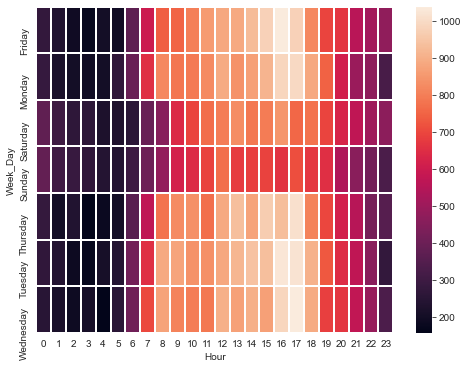

In [235]:
plt.figure(figsize=(8,6))
sns.heatmap(day_hr,linewidth=1)
plt.show()